In [15]:
# This program produces a plot of the "nino3.4" monthly sea surface temperature
# deviations from climatology since 2010.  This index is an indicator
# of the state and strength of the El Nino / Southern Oscillation (ENSO) phenomenon.
#
# Todd Mitchell, June 2019

import numpy as np
import matplotlib.pyplot as plt
import os

In [27]:
# tpm.py, which is also on this repository, is a module of geophysical data analysis functions.
# "TPM" are my initials.
import sys
sys.path.insert( 0, '/Users/mitchell/Documents/PYTHON/modules/mitchell/' )
import tpm   
dir(tpm) 
# help( tpm.__name__)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'anomalies',
 'arclength',
 'fill_year',
 'find_latlon',
 'plot_vertical_lines',
 'space_longitudes',
 'threetotwo',
 'time_shift',
 'write_ts',
 'yearsmonths',
 'yearsmonthsdays']

In [3]:
# Need this line to view plots in jupyter notebook
%matplotlib inline

In [67]:
# Ingest the data
from subprocess import call

# Download data from the NOAA Climate Prediction Center
# The "91-20" in the filename refers to the 1991-2020 climatology used in the dataset.
fn = 'ersst5.nino.mth.91-20.ascii'
call( [ 'wget', '--no-check-certificate', 'https://www.cpc.ncep.noaa.gov/data/indices/' + fn ] ) 

0

In [69]:
import pandas as pd
df = pd.read_csv( fn, delimiter=r"\s+" )
print( df.dtypes.index.to_list() )
yr1 = df[ 'YR' ].min()  # Determine the first and last years of data
yr2 = df[ 'YR' ].max()
print( f'The timeseries span {yr1} through {yr2}' )


['YR', 'MON', 'NINO1+2', 'ANOM', 'NINO3', 'ANOM.1', 'NINO4', 'ANOM.2', 'NINO3.4', 'ANOM.3']
The timeseries span 1950 through 2021


In [36]:
# The nino3.4 anomaly timeseries is column 9 of the table.  I am ingesting deviations with
# respect to a 1991-2020 climatology
ts = df.iloc[ :, 9 ]
# The last year of data is sometimes incomplete.  Add nan's to complete years if necessary.
ts = tpm.fill_year( ts )


In [37]:
call( [ '/bin/rm', 'ersst5.nino.mth.91-20.ascii' ] )  # Delete the file

nyr = yr2 - yr1 + 1
nt = nyr * 12


/Users/mitchell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater_equal
  
/Users/mitchell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app


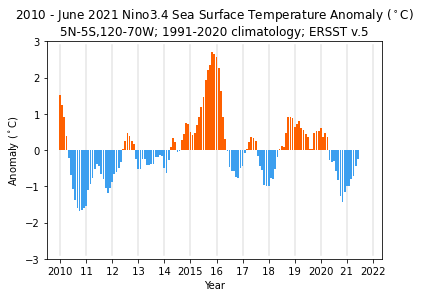

In [86]:
# The data spans 1950 - present.  Plot the data beginning with 2010

red  = tuple( np.asarray( [ 255,  96,   0, 256 ] ) / 256 )
blue = tuple( np.asarray( [  60, 160, 240, 256 ] ) / 256 )

x = np.arange( 1, len(ts)+1 ).astype( float )  # An index of abscissa points                       
skip =int( ( 2010 - yr1 ) * 12 )
x2  = x[  skip: ]
ts2 = ts[ skip: ]

ymax = max( np.abs( ts2 ) )
plt.clf()
# The positive and negative values are plotted separately in red and blue, respectively
plt.bar( x2[ ts2>=0 ], ts2[ ts2>=0 ], zorder=5, color=red )
plt.bar( x2[ ts2< 0 ], ts2[ ts2< 0 ], zorder=5, color=blue )
plt.ylim( ( -3, 3 ))
plt.xlim( ( skip-5, nt+5 ) )
tpm.plot_vertical_lines( ( skip+1, nt+12, 12 ), ( -2.9, 2.9 ), -1 )  # plot under the bars
plt.xticks( np.arange( skip+1, nt+12, step=12 ), ( '2010', ' 11 ', ' 12 ', ' 13 ', ' 14 ',
   '2015', ' 16 ', ' 17 ', ' 18 ', ' 19 ', '2020', ' 21 ', '2022' ) )
plt.xticks( np.arange( skip+1, nt+12, step=12 ) )
plt.title( r'2010 - June 2021 Nino3.4 Sea Surface Temperature Anomaly ($^\circ$C)'
           '\n' r'5N-5S,120-70W; 1991-2020 climatology; ERSST v.5' )
plt.xlabel( 'Year')
plt.ylabel( 'Anomaly ($^\circ$C)')
# Saving the file as PS or PDF eliminates the aliasing you see in the plot.
plt.savefig( 'sstanomnino342010jun2021.ps')
plt.show()

# The runtime error you get with incomplete years, years that don't have data through December, 
# is that ts2 has missing values ( nan's ) for the months without data.  I expect that there 
# is a way to turn that error-message off.
